# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [2]:
raw_data = loadmat('data/ex6data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [17]:
data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


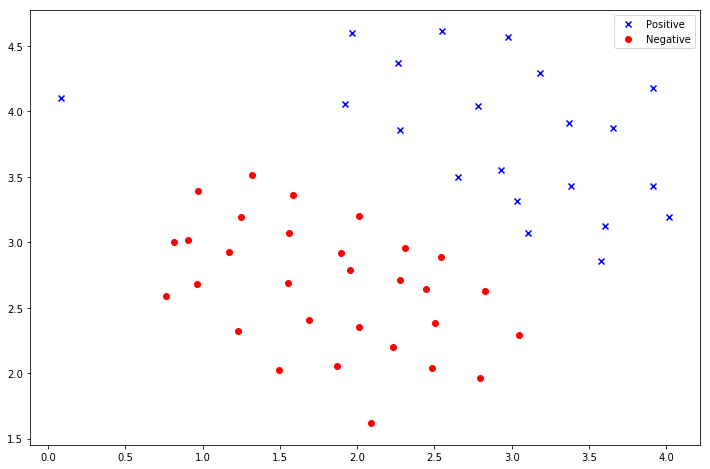

In [20]:
positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(positive['X1'], positive['X2'], c = 'blue', marker = 'x', label = 'Positive')
ax.scatter(negative['X1'], negative['X2'], c = 'r', marker = 'o', label = 'Negative')
ax.legend()

In [23]:
from sklearn import svm
svmC = svm.LinearSVC(C = 1, loss = 'hinge', max_iter = 1000)
svmC

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [24]:
svmC.fit(data[['X1', 'X2']], data['y'])
svmC.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [28]:
data[svmC.predict(data[['X1', 'X2']]) != data['y']]

,X1,X2,y
50,0.086405,4.1045,1


In [29]:
svmC2 = svm.LinearSVC(C = 100, loss = 'hinge', max_iter=1000)
svmC2.fit(data[['X1', 'X2']], data['y'])
svmC2.score(data[['X1', 'X2']], data['y'])

1.0

In [30]:
data['SVM 1 Confidence'] = svmC.decision_function(data[['X1', 'X2']])
data.head()

,X1,X2,y,SVM 1 Confidence
0,1.9643,4.5957,1,0.802027
1,2.2753,3.8589,1,0.383295
2,2.9781,4.5651,1,1.376518
3,2.9320,3.5519,1,0.520538
4,3.5772,2.8560,1,0.332890


Text(0.5,1,'SVM (C=1) Decision Confidence')

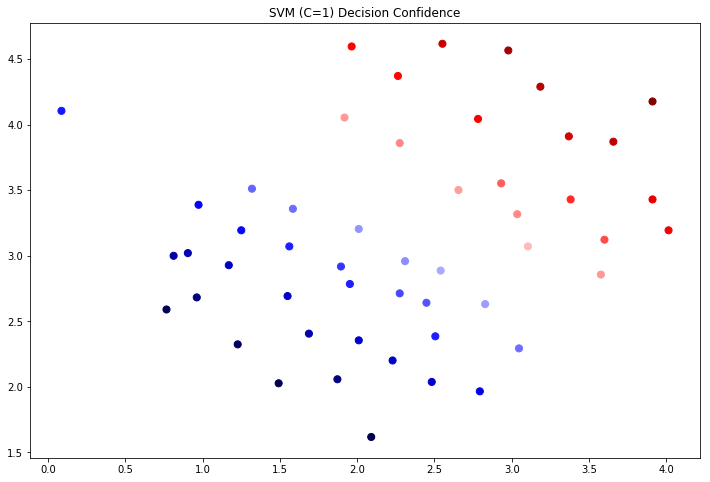

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['SVM 1 Confidence'], cmap = 'seismic')
ax.set_title('SVM (C=1) Decision Confidence')

Text(0.5,1,'SVM (C=100) Decision Confidence')

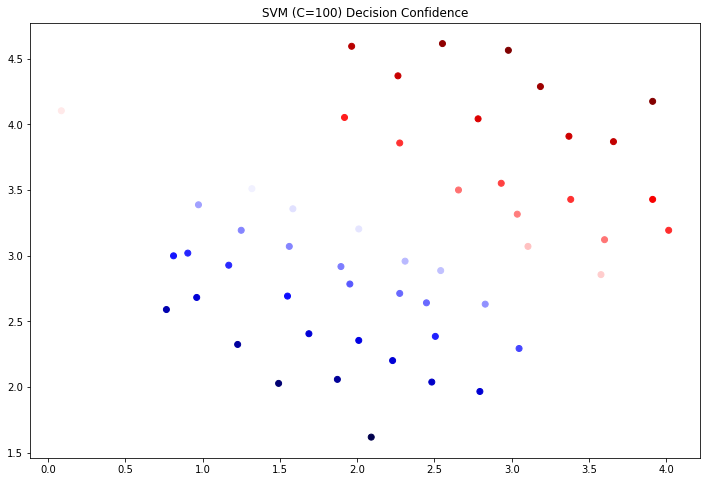

In [32]:
data['SVM 2 Confidence'] = svmC2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(data['X1'], data['X2'], c = data['SVM 2 Confidence'], cmap = 'seismic')
ax.set_title('SVM (C=100) Decision Confidence')

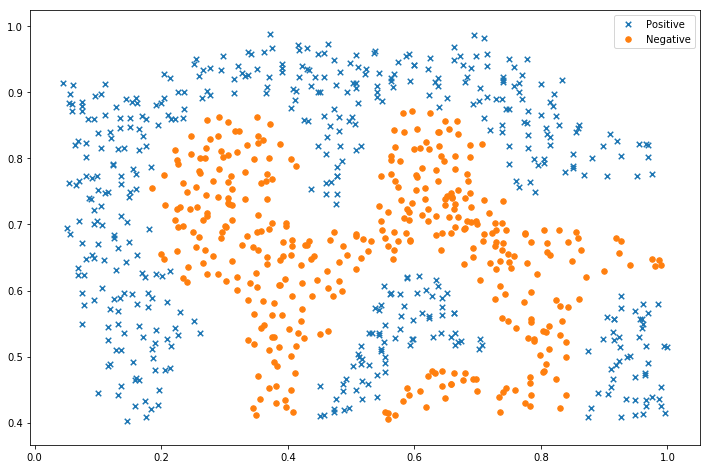

In [35]:
raw_data = loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns = ['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['X1'], positive['X2'], s = 30, marker = 'x', label = 'Positive')
ax.scatter(negative['X1'], negative['X2'], s = 30, marker = 'o', label = 'Negative')
ax.legend()

In [36]:
svc = svm.SVC(C = 100, gamma = 10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [38]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:, 0]

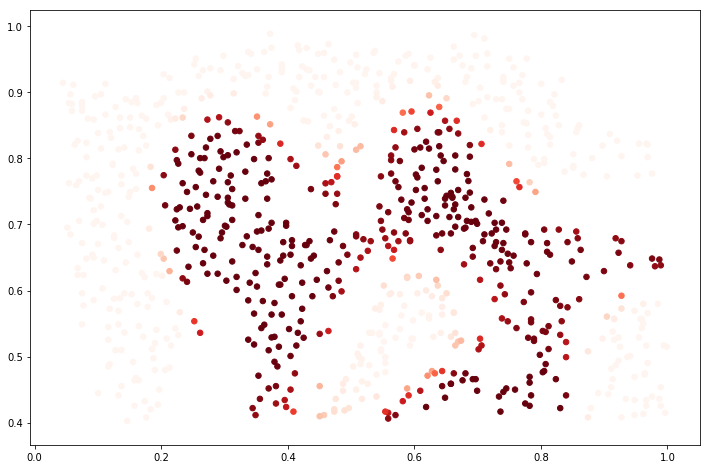

In [39]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(data['X1'], data['X2'], s = 30, c = data['Probability'], cmap = 'Reds')

In [2]:
raw_data = loadmat('data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

parameters = {'C':C_values, 'gamma':gamma_values}

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn import svm

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [8]:
clf.best_score_

0.9004739336492891

In [9]:
ypred = clf.predict(Xval)
print(metrics.classification_report(yval, ypred))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96       113
          1       0.95      0.93      0.94        87

avg / total       0.95      0.95      0.95       200



In [2]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [4]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y']
ytest = spam_test['ytest']

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [11]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X, y.ravel())

print('Training accuracy: {0}%'.format(round(svc.score(X, y) * 100, 2)))

Training accuracy: 94.4%


In [12]:
print('Test accuracy: {0}%'.format(round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy: 95.3%
